# Análise Exploratória de Dados: Avistamentos de OVNIs no Pará 📊

<img src="https://ichef.bbci.co.uk/ace/ws/640/cpsprodpb/D9FF/production/_97170855_bbc_acervodecarlosmendes2.jpg.webp" width="600"/>








Este projeto tem como objetivo realizar uma análise exploratória do dataset "UFOs in the Amazon", disponível no Kaggle, que reúne relatos de avistamentos de objetos voadores não identificados (OVNIs) na região amazônica.

A Amazônia é frequentemente citada em fenômenos aéreos não explicados, sendo palco de casos emblemáticos como a Operação Prato, conduzida pela Força Aérea Brasileira nos anos 1970. Essa operação investigou ocorrências em cidades como Colares, onde moradores relataram luzes intensas, movimentos incomuns e até efeitos físicos.

A análise busca identificar padrões geográficos, temporais e descritivos dos avistamentos, respondendo perguntas como:

Onde os avistamentos são mais comuns?

Em que horários e períodos eles ocorrem com mais frequência?

Quais os formatos e comportamentos mais relatados?

A partir dos dados, espera-se obter insights que contribuam para a compreensão desse fenômeno.


---



Link do dataset: [UFOs in the Amazon](https://www.kaggle.com/datasets/andantdf/ufos-in-the-amazon)



# IMPORTAÇÃO DE BIBLIOTECAS E INFORMAÇÕES DO DATASET

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#biblioteca Python usada para criar mapas interativos
!pip install folium

In [4]:
from google.colab import files

uploaded = files.upload()

Saving coordenadas_geograficas.csv to coordenadas_geograficas.csv
Saving registros_observacao_ovni.csv to registros_observacao_ovni.csv


In [5]:
df_observacoes = pd.read_csv('registros_observacao_ovni.csv', sep=';', encoding='latin1')
df_coordenadas = pd.read_csv('coordenadas_geograficas.csv', sep=';', encoding='latin1')

In [6]:
# Verificando os primeiros registros
print("📄 Observações de OVNIs:")
display(df_observacoes.head())

📄 Observações de OVNIs:


,RegNum,Cidade,Local,Data,Hora,Descricao,Cor,Forma,Tamanho,Movimento,Velocidade,Altitude,Distancia,Observadores,Nota,Anexo
0,1,Santo Antônio do Tauá,Rod. PA-17 Km 19,02/09/77,22:00:00,Corpo luminoso,"Amarela, mudando para vermelho","Prato invertido, com um vértice acentuado form...","1,3","Em zig-zag, no sentido leste/oeste","Baixa, no início do deslocamento, aumento grad...",30.0,50.0,Amélia Martins da Silva,A parte inferior (azulada) pareceu à relatora ...,Cópia de 2 croquis
1,2,Santo Antônio do Tauá,Rod PA-17 Km 12,22/09/77,21:30:00,Corpo luminoso,"Amarela avermelhada, emitindo foco de luz azul...",Indefinida,NaN,"Voo picado em direção ao relator, sentido Lest...",Variável,NaN,NaN,Raimundo Francisco das Chagas,"Ruído simbilante, como um dínamo (comparado)",Cópia de um croqui
2,3,Santo Antônio do Tauá,Côlonia Campo Cerrado,12/10/77,02:00:00,Corpo luminoso,"Azul, com listras pretas","Circular, disposta em duas seções, tendo na pa...","1,4","Ondulante (sentido lateral), de Leste/Oeste",Variável,20.0,20.0,Manoel Matos de Souza,"O relator tentou atirar no OVNI, tendo sido at...",NaN
3,4,Colares,NaN,13/10/77,03:25:00,Corpo luminoso,Avermelhada (parte superior) e azul esverdeada...,Indefinida,"0,5","Trajetória reta, no sentido Norte/Sul",Supersônica,20.0,75.0,Padre Alfredo de Lá Ó,Forte luminosidade sobre a água. O relator des...,Cópia de um croqui.
4,5,Santo Antônio do Tauá,Colônia de São Braz,14/10/77,03:00:00,Corpo luminoso,"Azul, brilho intenso (solda elétrica)",Indefinida,NaN,Pendular (ondulante). Deslocamento de Sudeste/...,Variável. Inicialmente baixa; acelerou.,30.0,30.0,Benedito Ferreira de Figueiredo,"O OVNI produziu intensa luminosidade, chegando...",NaN


In [7]:
print("📍 Coordenadas geográficas:")
display(df_coordenadas.head())

📍 Coordenadas geográficas:


,"UF,Cidade,Latitude,Longitude"
0,"PA,Colares,-0.9361,-48.2803"
1,"PA,Vigia,-0.8630,-48.1311"
2,"PA,Santo Antônio do Tauá,-1.1524,-48.1292"
3,"PA,Mosqueiro,-1.1000,-48.4333"
4,"PA,Benfica,-1.3667,-48.3833"


In [8]:
# Verificando colunas e tipos de dados
print("\n🔎 Informações do DataFrame de observações:")
df_observacoes.info()


🔎 Informações do DataFrame de observações:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RegNum        130 non-null    int64  
 1   Cidade        130 non-null    object 
 2   Local         74 non-null     object 
 3   Data          130 non-null    object 
 4   Hora          130 non-null    object 
 5   Descricao     130 non-null    object 
 6   Cor           130 non-null    object 
 7   Forma         130 non-null    object 
 8   Tamanho       101 non-null    object 
 9   Movimento     129 non-null    object 
 10  Velocidade    119 non-null    object 
 11  Altitude      117 non-null    float64
 12  Distancia     123 non-null    float64
 13  Observadores  130 non-null    object 
 14  Nota          124 non-null    object 
 15  Anexo         42 non-null     object 
dtypes: float64(2), int64(1), object(13)
memory usage: 16.4+ KB


In [9]:
df_observacoes[['Altitude', 'Distancia']].describe()

,Altitude,Distancia
count,117.000000,123.000000
mean,1769.547009,2872.032520
std,2828.458281,3545.228543
min,0.000000,20.000000
25%,100.000000,500.000000
50%,500.000000,1500.000000
75%,2000.000000,3000.000000
max,12000.000000,15000.000000


# LIMPEZA E PRÉ-PROCESSAMENTO DOS DADOS

In [10]:
#Informações do DataFrame de coordenadas
df_coordenadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 1 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   UF,Cidade,Latitude,Longitude  13 non-null     object
dtypes: object(1)
memory usage: 236.0+ bytes


In [11]:
# Verificando valores ausentes
print(df_observacoes.isnull().sum())

RegNum           0
Cidade           0
Local           56
Data             0
Hora             0
Descricao        0
Cor              0
Forma            0
Tamanho         29
Movimento        1
Velocidade      11
Altitude        13
Distancia        7
Observadores     0
Nota             6
Anexo           88
dtype: int64


In [12]:
print(df_coordenadas.isnull().sum())

UF,Cidade,Latitude,Longitude    0
dtype: int64


In [13]:
# Preenchendo valores ausentes nas colunas de df_observacoes
df_observacoes['Local'].fillna('Desconhecido', inplace=True)
df_observacoes['Tamanho'].fillna('Desconhecido', inplace=True)
df_observacoes['Movimento'].fillna('Desconhecido', inplace=True)
df_observacoes['Velocidade'].fillna(df_observacoes['Velocidade'].mode()[0], inplace=True)  # Preenche com o valor mais comum
df_observacoes['Altitude'].fillna(df_observacoes['Altitude'].median(), inplace=True)  # Preenche com a mediana
df_observacoes['Distancia'].fillna(df_observacoes['Distancia'].median(), inplace=True)  # Preenche com a mediana
df_observacoes['Nota'].fillna('Não especificada', inplace=True)
df_observacoes['Anexo'].fillna('Não disponível', inplace=True)

# Verificando a limpeza
print(df_observacoes.isnull().sum())

RegNum          0
Cidade          0
Local           0
Data            0
Hora            0
Descricao       0
Cor             0
Forma           0
Tamanho         0
Movimento       0
Velocidade      0
Altitude        0
Distancia       0
Observadores    0
Nota            0
Anexo           0
dtype: int64


<ipython-input-13-eab588a620e9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_observacoes['Local'].fillna('Desconhecido', inplace=True)
<ipython-input-13-eab588a620e9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [14]:
# Separar a única coluna em 4
df_coordenadas = df_coordenadas['UF,Cidade,Latitude,Longitude'].str.split(',', expand=True)
df_coordenadas.columns = ['UF', 'Cidade', 'Latitude', 'Longitude']

# Conferindo resultado
df_coordenadas.head()

,UF,Cidade,Latitude,Longitude
0,PA,Colares,-0.9361,-48.2803
1,PA,Vigia,-0.8630,-48.1311
2,PA,Santo Antônio do Tauá,-1.1524,-48.1292
3,PA,Mosqueiro,-1.1000,-48.4333
4,PA,Benfica,-1.3667,-48.3833


In [15]:
#Pré-processamento de dados temporais

# Corrigir possível problema de espaço e unir colunas
df_observacoes['DataHora'] = df_observacoes['Data'].str.strip() + ' ' + df_observacoes['Hora'].str.strip()

# Conversão para datetime
df_observacoes['DataHora'] = pd.to_datetime(df_observacoes['DataHora'], errors='coerce', dayfirst=True)

# Criação de colunas auxiliares
df_observacoes['Ano'] = df_observacoes['DataHora'].dt.year
df_observacoes['Mes'] = df_observacoes['DataHora'].dt.month
df_observacoes['Dia'] = df_observacoes['DataHora'].dt.day
df_observacoes['Hora_Obs'] = df_observacoes['DataHora'].dt.hour

df_observacoes[['DataHora', 'Ano', 'Mes', 'Dia', 'Hora_Obs']].head()

<ipython-input-15-1ed208b9eead>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_observacoes['DataHora'] = pd.to_datetime(df_observacoes['DataHora'], errors='coerce', dayfirst=True)


,DataHora,Ano,Mes,Dia,Hora_Obs
0,1977-09-02 22:00:00,1977,9,2,22
1,1977-09-22 21:30:00,1977,9,22,21
2,1977-10-12 02:00:00,1977,10,12,2
3,1977-10-13 03:25:00,1977,10,13,3
4,1977-10-14 03:00:00,1977,10,14,3


In [16]:
!pip install unidecode
#Padronização dos nomes das cidades
# Padronizar nomes: tirar espaços extras, colocar em maiúsculas e remover acentos
import unidecode

# Padronizar nomes de cidades nas observações
df_observacoes['Cidade'] = df_observacoes['Cidade'].str.strip().str.upper()
df_observacoes['Cidade'] = df_observacoes['Cidade'].apply(unidecode.unidecode)

# Padronizar nomes de cidades nas coordenadas
df_coordenadas['Cidade'] = df_coordenadas['Cidade'].str.strip().str.upper()
df_coordenadas['Cidade'] = df_coordenadas['Cidade'].apply(unidecode.unidecode)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 5.2 MB/s eta 0:00:00


In [17]:
# junta as informações de coordenadas (como Latitude e Longitude) com as observações de avistamentos
# Merge com base na cidade
df_final = pd.merge(df_observacoes, df_coordenadas, on='Cidade', how='left')

# Verificar se houve cidades sem coordenadas
missing_coords = df_final[df_final['Latitude'].isnull()]
print(f"Cidades sem coordenadas: {missing_coords['Cidade'].unique()}")

Cidades sem coordenadas: ['CAMPO CERRADO' 'BAIA DO MARAJO']


In [18]:
# Fazer merge entre as tabelas
df_completo = pd.merge(df_observacoes, df_coordenadas[['Cidade', 'Latitude', 'Longitude']], on='Cidade', how='left')

# Verificar as primeiras linhas do DataFrame resultante
df_completo.head()

,RegNum,Cidade,Local,Data,Hora,Descricao,Cor,Forma,Tamanho,Movimento,...,Observadores,Nota,Anexo,DataHora,Ano,Mes,Dia,Hora_Obs,Latitude,Longitude
0,1,SANTO ANTONIO DO TAUA,Rod. PA-17 Km 19,02/09/77,22:00:00,Corpo luminoso,"Amarela, mudando para vermelho","Prato invertido, com um vértice acentuado form...","1,3","Em zig-zag, no sentido leste/oeste",...,Amélia Martins da Silva,A parte inferior (azulada) pareceu à relatora ...,Cópia de 2 croquis,1977-09-02 22:00:00,1977,9,2,22,-1.1524,-48.1292
1,2,SANTO ANTONIO DO TAUA,Rod PA-17 Km 12,22/09/77,21:30:00,Corpo luminoso,"Amarela avermelhada, emitindo foco de luz azul...",Indefinida,Desconhecido,"Voo picado em direção ao relator, sentido Lest...",...,Raimundo Francisco das Chagas,"Ruído simbilante, como um dínamo (comparado)",Cópia de um croqui,1977-09-22 21:30:00,1977,9,22,21,-1.1524,-48.1292
2,3,SANTO ANTONIO DO TAUA,Côlonia Campo Cerrado,12/10/77,02:00:00,Corpo luminoso,"Azul, com listras pretas","Circular, disposta em duas seções, tendo na pa...","1,4","Ondulante (sentido lateral), de Leste/Oeste",...,Manoel Matos de Souza,"O relator tentou atirar no OVNI, tendo sido at...",Não disponível,1977-10-12 02:00:00,1977,10,12,2,-1.1524,-48.1292
3,4,COLARES,Desconhecido,13/10/77,03:25:00,Corpo luminoso,Avermelhada (parte superior) e azul esverdeada...,Indefinida,"0,5","Trajetória reta, no sentido Norte/Sul",...,Padre Alfredo de Lá Ó,Forte luminosidade sobre a água. O relator des...,Cópia de um croqui.,1977-10-13 03:25:00,1977,10,13,3,-0.9361,-48.2803
4,5,SANTO ANTONIO DO TAUA,Colônia de São Braz,14/10/77,03:00:00,Corpo luminoso,"Azul, brilho intenso (solda elétrica)",Indefinida,Desconhecido,Pendular (ondulante). Deslocamento de Sudeste/...,...,Benedito Ferreira de Figueiredo,"O OVNI produziu intensa luminosidade, chegando...",Não disponível,1977-10-14 03:00:00,1977,10,14,3,-1.1524,-48.1292


### Distribuição Temporal dos Avistamentos


In [19]:
# Converter a coluna 'Data' para datetime
df_completo['Data'] = pd.to_datetime(df_completo['Data'], errors='coerce')

# Extrair o ano e o mês
df_completo['Ano'] = df_completo['Data'].dt.year
df_completo['Mes'] = df_completo['Data'].dt.month
df_completo['Hora'] = pd.to_datetime(df_completo['Hora'], errors='coerce').dt.hour

# Verificar as primeiras linhas
df_completo[['Data', 'Ano', 'Mes', 'Hora']].head()

<ipython-input-19-2942793967e5>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_completo['Data'] = pd.to_datetime(df_completo['Data'], errors='coerce')
<ipython-input-19-2942793967e5>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_completo['Hora'] = pd.to_datetime(df_completo['Hora'], errors='coerce').dt.hour


,Data,Ano,Mes,Hora
0,1977-02-09,1977,2,22
1,1977-09-22,1977,9,21
2,1977-12-10,1977,12,2
3,1977-10-13,1977,10,3
4,1977-10-14,1977,10,3


# ANÁLISE EXPLORATÓRIA

## Localizações mais Frequentes

In [20]:
localizacoes = df_observacoes['Cidade'].value_counts()

# cidades com mais avistamentos
localizacoes.head(10)

,count
Cidade,
COLARES,38
MOSQUEIRO,30
BENEVIDES,17
BELEM,9
BAIA DO MARAJO,8
VIGIA,5
SANTO ANTONIO DO TAUA,5
SAO DOMINGOS DO CAPIM,4
BENFICA,4


<ipython-input-21-d4a1db9fcc9a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cidades.values, y=top_cidades.index, palette='Blues_r')


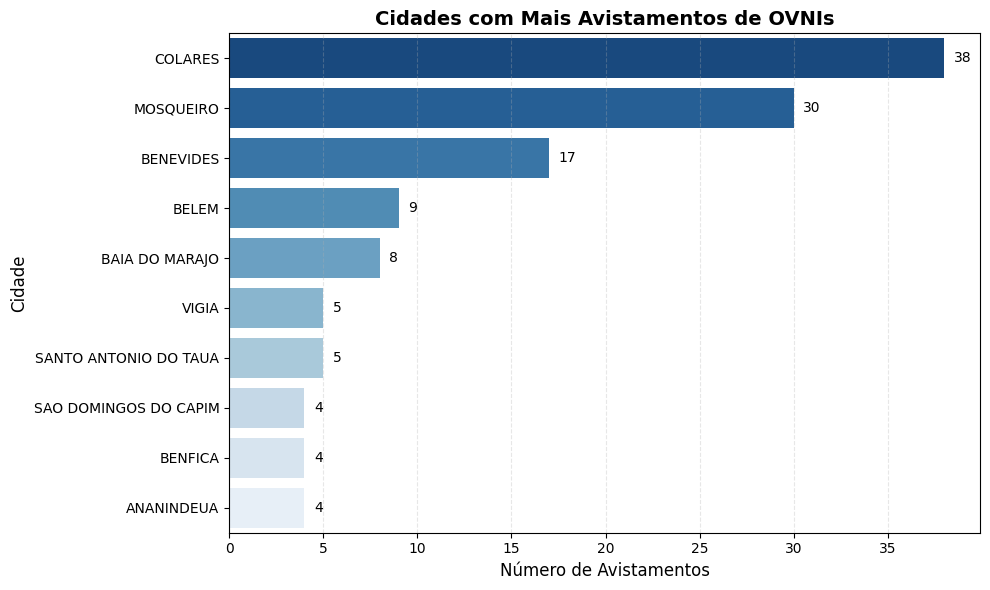

In [21]:
# cidades com mais avistamentos
top_cidades = df_completo['Cidade'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_cidades.values, y=top_cidades.index, palette='Blues_r')

plt.title('Cidades com Mais Avistamentos de OVNIs', fontsize=14, fontweight='bold')
plt.xlabel('Número de Avistamentos', fontsize=12)
plt.ylabel('Cidade', fontsize=12)

# valores nas barras
for i, v in enumerate(top_cidades.values):
    plt.text(v + 0.5, i, str(v), color='black', va='center')

plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.show()

As cidades com maior número de ocorrências são Colares (38) e Mosqueiro (30), o que sugere uma possível maior relevância ou atratividade desses locais para o fenômeno. Em contraste, municípios como Vigia e São Domingos do Capim, com apenas 5 e 4 registros, respectivamente, apresentam menor envolvimento. Esses dados podem indicar que o fenômeno tende a ocorrer com mais frequência em regiões menos urbanizadas ou mais afastadas dos grandes centros urbanos, como é o caso de Colares e Mosqueiro.



## Análise Temporal dos Avistamentos




<ipython-input-22-ef6d4800c834>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_observacoes['Data'] = pd.to_datetime(df_observacoes['Data'], errors='coerce')


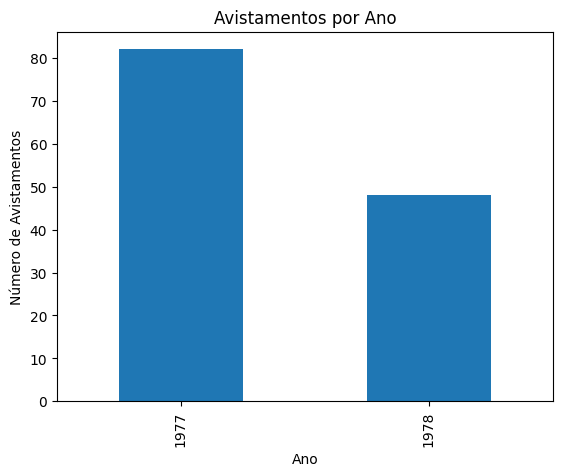

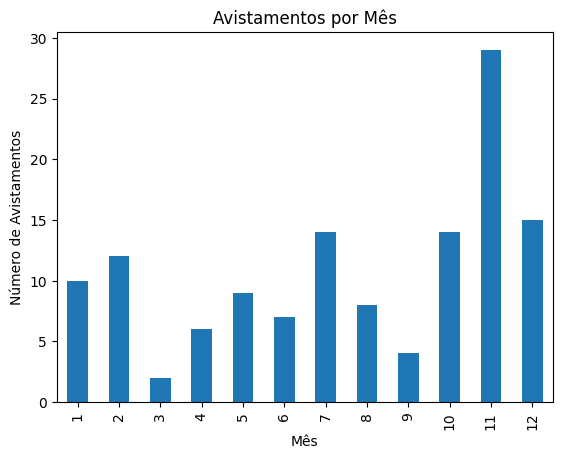

In [22]:
df_observacoes['Data'] = pd.to_datetime(df_observacoes['Data'], errors='coerce')

# Análise por ano
avistamentos_por_ano = df_observacoes.groupby(df_observacoes['Data'].dt.year).size()

# Análise por mês
avistamentos_por_mes = df_observacoes.groupby(df_observacoes['Data'].dt.month).size()

avistamentos_por_ano.plot(kind='bar')
plt.title('Avistamentos por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Avistamentos')
plt.show()

# avistamentos por mês
avistamentos_por_mes.plot(kind='bar')
plt.title('Avistamentos por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Avistamentos')
plt.show()


Os avistamentos apresentam uma concentração marcante nos anos de 1977 e 1978, com um pico expressivo em 1977, especialmente entre julho e dezembro. Esse padrão coincide com o auge dos eventos investigados pela Operação Prato, iniciada pela Força Aérea Brasileira em outubro de 1977 em resposta à onda de relatos na região amazônica.

O mês de novembro se destaca como o período com maior número de registros, possivelmente relacionado a condições climáticas favoráveis, eventos sociais ou maior observação do céu durante esse período.

Esses dados reforçam a ligação entre os picos de avistamentos e os eventos históricos da Operação Prato, indicando uma fase de intensa atividade e documentação de fenômenos aéreos não identificados na Amazônia.

## Distribuição por Hora dos Avistamentos




In [23]:
# Converter 'Hora' para o formato correto
df_completo['Hora'] = pd.to_datetime(df_completo['Hora'], errors='coerce').dt.hour


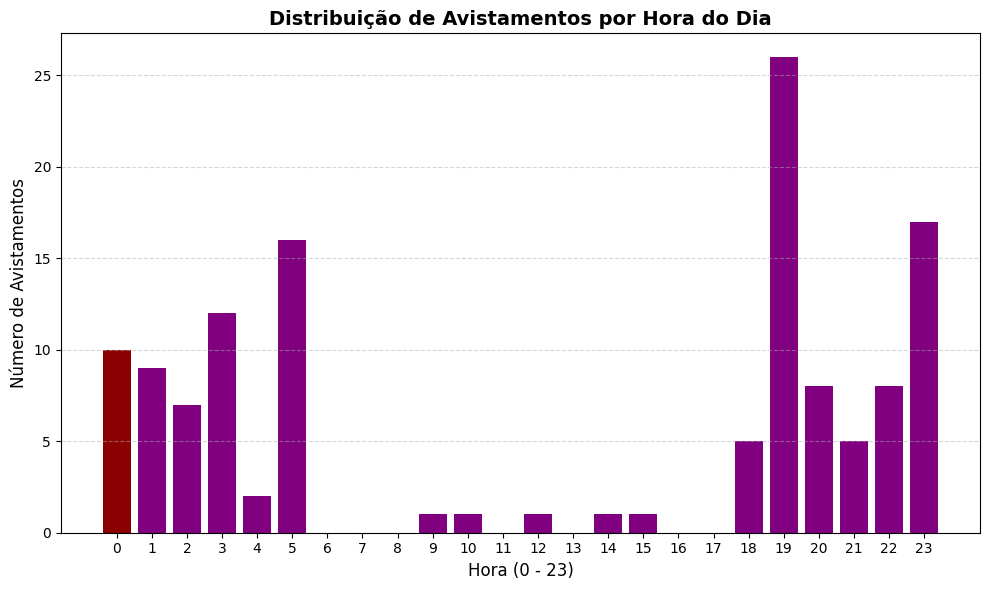

In [24]:
import matplotlib.pyplot as plt

hora_counts = df_observacoes['Hora_Obs'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
for i in range(24):
    color = 'darkred' if i == 0 else 'purple'
    plt.bar(i, hora_counts.get(i, 0), color=color)

plt.title('Distribuição de Avistamentos por Hora do Dia', fontsize=14, fontweight='bold')
plt.xlabel('Hora (0 - 23)', fontsize=12)
plt.ylabel('Número de Avistamentos', fontsize=12)
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


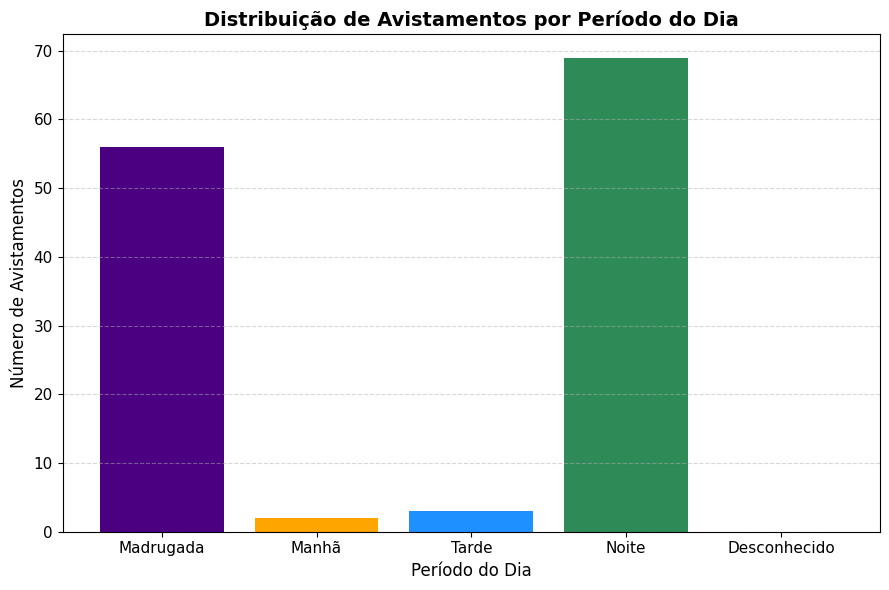

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Função para categorizar o período com base na hora
def categorizar_periodo(hora):
    if pd.isna(hora):
        return 'Desconhecido'
    elif 0 <= hora < 6:
        return 'Madrugada'
    elif 6 <= hora < 12:
        return 'Manhã'
    elif 12 <= hora < 18:
        return 'Tarde'
    else:
        return 'Noite'

# Aplicar a função à coluna de hora
df_observacoes['Periodo'] = df_observacoes['Hora_Obs'].apply(categorizar_periodo)

# Contar ocorrências por período
periodo_counts = df_observacoes['Periodo'].value_counts()
periodo_counts = periodo_counts.reindex(['Madrugada', 'Manhã', 'Tarde', 'Noite', 'Desconhecido'], fill_value=0)

# Cores para cada período
cores = {
    'Madrugada': '#4B0082',     # roxo escuro
    'Manhã': '#FFA500',         # laranja
    'Tarde': '#1E90FF',         # azul
    'Noite': '#2E8B57',         # verde escuro
    'Desconhecido': '#A9A9A9'   # cinza
}

# Plotagem
plt.figure(figsize=(9, 6))
plt.bar(periodo_counts.index, periodo_counts.values, color=[cores[p] for p in periodo_counts.index])

plt.title('Distribuição de Avistamentos por Período do Dia', fontsize=14, fontweight='bold')
plt.xlabel('Período do Dia', fontsize=12)
plt.ylabel('Número de Avistamentos', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


A análise mostra que os avistamentos de OVNIs ocorrem majoritariamente à noite e de madrugada, com pico às 19h, seguido por 23h e 5h.

Esse padrão coincide com o horário em que o céu já está escuro, mas ainda há observadores ativos ou despertando, favorecendo a visibilidade de luzes e objetos no céu.

Entre 6h e 17h, os registros são mínimos, possivelmente devido à luz solar intensa e menor atenção ao céu durante o dia.

Os horários com maior concentração coincidem com os relatos da Operação Prato, cujos registros oficiais apontam ocorrências entre 20h e 4h da manhã, incluindo episódios de ataques luminosos conhecidos como “chupa-chupa”, que geraram medo e abandono de residências por parte dos moradores.

Este padrão noturno reforça tanto a natureza dos fenômenos relatados quanto fatores ambientais que influenciam na observação e no registro dos eventos.



## Distribuição dos Avistamentos por Dia da Semana

<ipython-input-26-b5115cbead6b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avistamentos_por_dia.index, y=avistamentos_por_dia.values, palette='Blues')


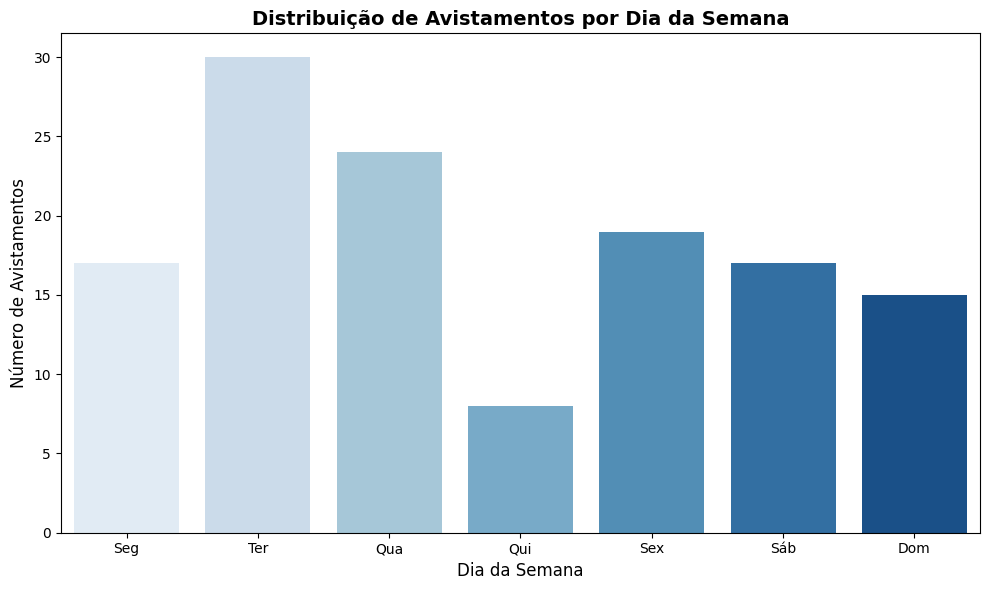

In [26]:
# Convertendo a coluna 'Data' para datetime
df_completo['Data'] = pd.to_datetime(df_completo['Data'], errors='coerce')

# Extraindo o dia da semana (0 = Segunda-feira, 6 = Domingo)
df_completo['Dia_da_Semana'] = df_completo['Data'].dt.dayofweek

# Contagem dos avistamentos por dia da semana
avistamentos_por_dia = df_completo['Dia_da_Semana'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=avistamentos_por_dia.index, y=avistamentos_por_dia.values, palette='Blues')

plt.title('Distribuição de Avistamentos por Dia da Semana', fontsize=14, fontweight='bold')
plt.xlabel('Dia da Semana', fontsize=12)
plt.ylabel('Número de Avistamentos', fontsize=12)
plt.xticks(ticks=range(7), labels=['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom'])
plt.tight_layout()
plt.show()


A terça-feira se destaca com o maior número de avistamentos (mais de 30), seguida pela quarta-feira (mais de 20). Os demais dias apresentam distribuição mais equilibrada, com registros entre 5 e 15.

Esse padrão pode indicar uma maior atenção ou disponibilidade para observação no início da semana, talvez relacionada a rotinas menos agitadas, menor interferência de eventos sociais ou culturais, ou simplesmente maior propensão das pessoas a reportarem o que observaram após o fim de semana.

Embora não exista uma explicação definitiva, esse dado abre espaço para hipóteses interessantes sobre o comportamento dos observadores e possíveis padrões sociais que influenciam os relatos.

## Análise de Tipos de Objetos Avistados


<ipython-input-27-27e1f5583e9f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=tipos_de_objetos.values, y=tipos_de_objetos.index, palette="flare")
<ipython-input-27-27e1f5583e9f>:16: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


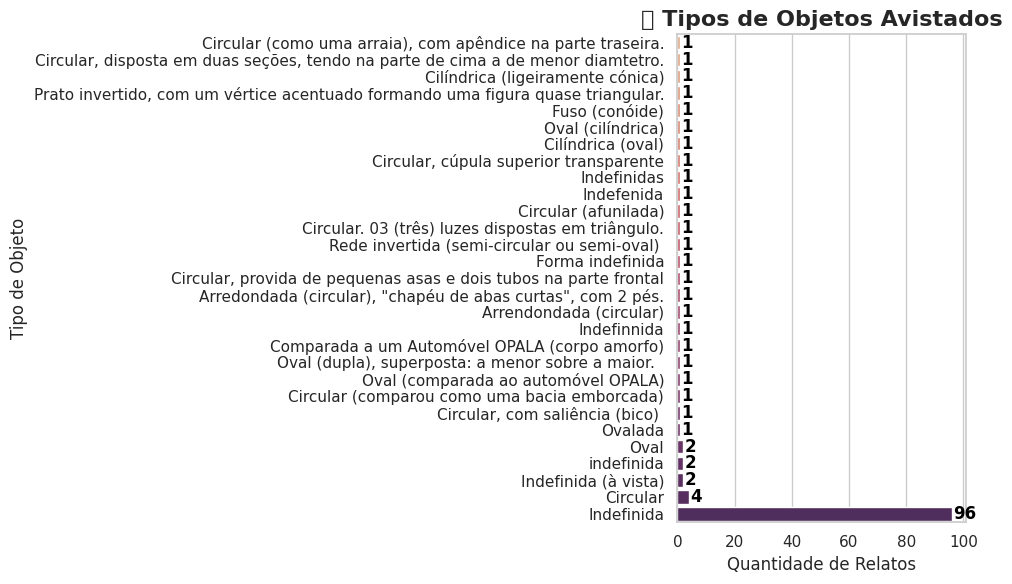

In [27]:
sns.set(style="whitegrid")

# Verifica se a coluna 'Forma' existe
if 'Forma' in df_completo.columns:
    tipos_de_objetos = df_completo['Forma'].value_counts().sort_values(ascending=True)

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=tipos_de_objetos.values, y=tipos_de_objetos.index, palette="flare")

    for i, v in enumerate(tipos_de_objetos.values):
        ax.text(v + 0.5, i, str(v), color='black', va='center', fontweight='bold')

    plt.title('🚀 Tipos de Objetos Avistados', fontsize=16, fontweight='bold')
    plt.xlabel('Quantidade de Relatos')
    plt.ylabel('Tipo de Objeto')
    plt.tight_layout()
    plt.show()




A maioria dos relatos descreve objetos com formas ovais ou circulares, totalizando mais de 30 registros, o que indica um padrão visual recorrente nos avistamentos.

As formas circulares incluem variações como cúpula, bacia, luzes agrupadas e formatos afunilados. As descrições ovais aparecem inclusive em comparações locais, como "semelhante a um Opala".

Também há grande presença de registros com forma indefinida, refletindo a dificuldade dos observadores em classificar os objetos visualizados — o que reforça o caráter misterioso dos fenômenos.

Formatos menos comuns, como cilíndrico, triangular, em fuso ou chapéu de abas curtas, foram relatados apenas uma vez cada.


## NUVEM DE PALAVRAS

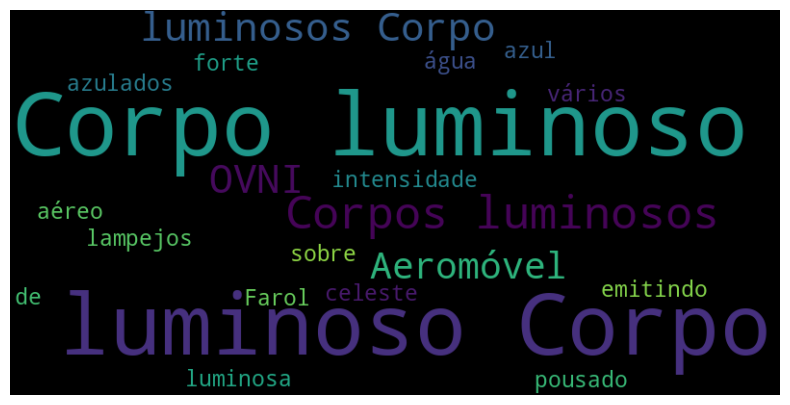

In [28]:
from wordcloud import WordCloud

#nuvem de palavras
descricao_texto = " ".join(desc for desc in df_observacoes['Descricao'].dropna())
wordcloud = WordCloud(width=800, height=400).generate(descricao_texto)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


A nuvem de palavras revela termos recorrentes como "corpo luminoso", "lampejos", "aéreo", "azulados" e "OVNI", indicando que os avistamentos geralmente envolvem objetos brilhantes, com emissão de luz intensa e comportamento incomum no céu.

Esses padrões reforçam a natureza misteriosa dos fenômenos relatados e a dificuldade em classificá-los com precisão, o que é típico em ocorrências ufológicas.

## Análise de Correlação (variáveis numéricas)
Identificação de relações entre variáveis de Altitude, Distancia e Hora


<ipython-input-29-85bc8f8ac1e1>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_observacoes['Hora'] = pd.to_datetime(df_observacoes['Hora'], errors='coerce')


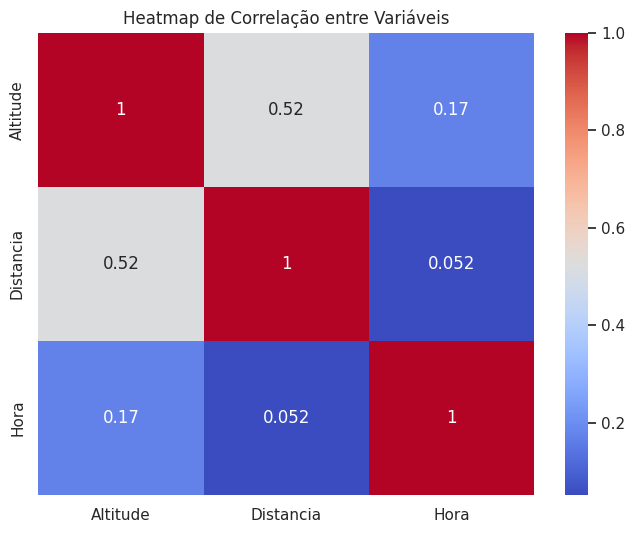

In [29]:
df_observacoes['Hora'] = pd.to_datetime(df_observacoes['Hora'], errors='coerce')

plt.figure(figsize=(8, 6))
sns.heatmap(df_observacoes[['Altitude', 'Distancia', 'Hora']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap de Correlação entre Variáveis')
plt.show()

O heatmap mostra a relação entre variáveis numéricas dos avistamentos. A correlação mais forte foi entre Altitude e Distância (0.52), indicando que objetos mais altos geralmente foram percebidos como mais distantes. A variável Hora apresentou baixa correlação com as demais, sugerindo que o horário dos avistamentos não influencia significativamente nem a altitude nem a distância dos objetos observados.

A maior correlação observada foi entre Altitude e Distância (0.52), indicando que objetos vistos a maiores altitudes tendem a estar mais distantes. Já a Hora teve baixa correlação com as demais variáveis, sugerindo que o horário do avistamento não influencia diretamente a altitude ou distância percebida dos objetos.

## Análise Espacial dos Avistamentos (mapas interativos)


In [30]:
# Forçar as colunas de Latitude e Longitude a serem numéricas
df_completo['Latitude'] = pd.to_numeric(df_completo['Latitude'], errors='coerce')
df_completo['Longitude'] = pd.to_numeric(df_completo['Longitude'], errors='coerce')

# Verificar se algum valor é NaN após a conversão
df_completo[['Latitude', 'Longitude']].isna().sum()


,0
Latitude,9
Longitude,9


Os avistamentos estão distribuídos ao longo das coordenadas de latitude 9 e longitude 9, indicando uma concentração de registros em uma área geograficamente específica. Essa distribuição pode ajudar a identificar possíveis padrões ou hotspots de avistamentos, sugerindo a relevância de certas regiões para o fenômeno observado.

In [31]:
#mapa interativo utilizando a biblioteca folium para visualizar os avistamentos com base nas coordenadas de Latitude e Longitude

import folium
# Filtrar as linhas onde Latitude e Longitude não são NaN
df_completo_sem_nan = df_completo.dropna(subset=['Latitude', 'Longitude'])

# Criar um mapa base centrado na posição média das coordenadas não nulas
mapa = folium.Map(location=[df_completo_sem_nan['Latitude'].mean(), df_completo_sem_nan['Longitude'].mean()], zoom_start=5)

# Adicionar marcadores para cada avistamento (apenas onde Latitude e Longitude não são NaN)
for idx, row in df_completo_sem_nan.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Cidade: {row['Cidade']}\nData: {row['Data']}\nHora: {row['Hora']}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(mapa)

mapa


Esse código gera um mapa interativo com marcadores azuis, cada um representando um avistamento, e ao clicar em cada marcador, informações sobre a cidade, data e hora do avistamento são exibidas.

## Agrupamentos (Clusterização) com K-Means
Para identificar padrões geográficos ou de características (ex: cor, forma, altitude).

In [32]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# clusterização com a latitude e longitude
coords = df_coordenadas[['Latitude', 'Longitude']]
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

kmeans = KMeans(n_clusters=3, random_state=42)
df_coordenadas['Cluster'] = kmeans.fit_predict(coords_scaled)

# visualização dos clusters
import folium
from folium.plugins import MarkerCluster

mapa = folium.Map(location=[-3.4653, -62.2159], zoom_start=5)
marker_cluster = MarkerCluster().add_to(mapa)

for _, row in df_coordenadas.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']],
                  popup=f"Cidade: {row['Cidade']} | Cluster: {row['Cluster']}",
                  icon=folium.Icon(color='blue')).add_to(marker_cluster)

mapa


O KMeans foi utilizado para agrupar os avistamentos de OVNIs em 3 clusters com base nas suas coordenadas geográficas (latitude e longitude).

- Clusters representam grupos de avistamentos localizados em áreas geograficamente próximas.

- Cada Cluster (0, 1 ou 2) identifica uma área com padrões similares de localização.

- Exemplo: Se um avistamento é do Cluster 2, significa que ele está em uma região geográfica semelhante a outros avistamentos desse cluster.

Essa clusterização ajuda a identificar áreas com maior ou menor concentração de avistamentos.



---

Os agrupamentos foram gerados com base na proximidade geográfica entre as cidades (latitude e longitude), independentemente da quantidade de avistamentos.
Assim, cada cluster representa uma região com localização semelhante, e não necessariamente com o mesmo volume de ocorrências.

# ✅CONCLUSÕES

A análise exploratória do dataset “UFOs in the Amazon” revelou padrões significativos nos relatos de avistamentos de objetos voadores não identificados (OVNIs) na região amazônica, com forte ligação ao contexto histórico da Operação Prato, realizada pela Força Aérea Brasileira entre 1977 e 1978.

📆 Temporalmente, o pico de ocorrências ocorreu em 1977, especialmente no mês de novembro, indicando uma possível intensificação do fenômeno nesse período. Os registros se concentram no período noturno, com destaque para os horários das 19h, 23h e 5h, e para o dia terça-feira, sugerindo padrões que podem estar ligados tanto à natureza dos eventos quanto ao comportamento dos observadores.

📍 Geograficamente, os municípios de Colares e Mosqueiro, no Pará, concentram a maior parte dos relatos, o que pode estar relacionado à sua localização isolada e histórico de ocorrências intensas — em especial Colares, epicentro da Operação Prato. A clusterização geográfica revelou três regiões com padrões semelhantes, possivelmente influenciadas por fatores ambientais, como baixa densidade populacional e vegetação densa.

🛸 Quanto às características dos objetos, predominaram as descrições de formas circulares ou ovais, com presença frequente de termos como "corpo luminoso", "lampejos" e "azulados", reforçando a natureza visualmente marcante e misteriosa desses eventos.

🔎 Esses achados reforçam a importância da Amazônia como um dos principais cenários de manifestações aéreas não explicadas no Brasil, e apontam caminhos para novas investigações — unindo dados, história e ciência de forma interdisciplinar.